In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)


# drive/"My Drive"/Colab_Notebooks/Word2Vec/simpsons_dataset.csv

In [5]:
df_Human = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Human/Demian_Eng_Human_Translated_Chapter_7.csv', encoding='cp1252')
df_DeepL = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/DeepL/Demian_Eng_DeepL_Translated_Chapter_5.csv', encoding='cp1252')
df_Google = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Google/Demian_Eng_Google_Translated_Chapter_7.csv', encoding='cp1252')
df_Microsoft = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Microsoft/Demian_Eng_Microsoft_Translated_Chapter_7.csv', encoding='cp1252')
df_Papago = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Papago/Demian_Eng_Papago_Translated_Chapter_5.csv', encoding='cp1252')

df_Original = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Demian_Ger_Original_Chapter_7.csv', encoding='cp1252')


print(df_Human.shape)
print(df_DeepL.shape)
print(df_Google.shape)
print(df_Microsoft.shape)
print(df_Papago.shape)
print(df_Original.shape)

(765, 2)
(517, 2)
(748, 2)
(836, 2)
(489, 2)
(837, 2)


In [6]:
print(df_Human.head())
print(df_DeepL.head())
print(df_Google.head())
print(df_Microsoft.head())
print(df_Papago.head())

   raw_character_text spoken_words
0                   1      DEMIAN 
1                   2          NaN
2                   3      DEMIAN 
3                   4          NaN
4                   5    VII. Eva 
   raw_character_text                            spoken_words
0                   1                                  demian
1                   2                            Chapter Five
2                   3  The bird fights its way out of the egg
3                   4                                     NaN
4                   5                                     NaN
   raw_character_text     spoken_words
0                   1           Demian
1                   2              NaN
2                   3  Seventh Chapter
3                   4         Mrs. Eva
4                   5              NaN
   raw_character_text     spoken_words
0                   1           Demian
1                   2              NaN
2                   3  Seventh chapter
3                   4       

In [7]:
print(df_Human.isnull().sum())
print(df_DeepL.isnull().sum())
print(df_Google.isnull().sum())

print(df_Microsoft.isnull().sum())
print(df_Papago.isnull().sum())
print(df_Original.isnull().sum())

raw_character_text      0
spoken_words          106
dtype: int64
raw_character_text     0
spoken_words          84
dtype: int64
raw_character_text      0
spoken_words          141
dtype: int64
raw_character_text      0
spoken_words          145
dtype: int64
raw_character_text     0
spoken_words          74
dtype: int64
raw_character_text      0
spoken_words          146
dtype: int64


In [8]:
df_Human = df_Human.dropna().reset_index(drop=True)
df_DeepL = df_DeepL.dropna().reset_index(drop=True)
df_Google = df_Google.dropna().reset_index(drop=True)
df_Microsoft = df_Microsoft.dropna().reset_index(drop=True)
df_Papago = df_Papago.dropna().reset_index(drop=True)
df_Original = df_Original.dropna().reset_index(drop=True)

print(df_Human.isnull().sum())
print(df_DeepL.isnull().sum())
print(df_Google.isnull().sum())
print(df_Microsoft.isnull().sum())
print(df_Papago.isnull().sum())
print(df_Original.isnull().sum())


raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64


In [9]:
print(df_Human.shape)
print(df_DeepL.shape)
print(df_Google.shape)
print(df_Microsoft.shape)
print(df_Papago.shape)

(659, 2)
(433, 2)
(607, 2)
(691, 2)
(415, 2)


In [0]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed




def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [0]:
brief_cleaning_Human = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Human['spoken_words'])
brief_cleaning_DeepL = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_DeepL['spoken_words'])
brief_cleaning_Google = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Google['spoken_words'])
brief_cleaning_Microsoft = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Microsoft['spoken_words'])
brief_cleaning_Papago = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Papago['spoken_words'])
brief_cleaning_Original = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Original['spoken_words'])

In [12]:
print(brief_cleaning_Human)
print(brief_cleaning_DeepL)
print(brief_cleaning_Google)
print(brief_cleaning_Microsoft)
print(brief_cleaning_Papago)

<generator object <genexpr> at 0x7f6c8465a468>
<generator object <genexpr> at 0x7f6c8465a7d8>
<generator object <genexpr> at 0x7f6c84679200>
<generator object <genexpr> at 0x7f6c84679888>
<generator object <genexpr> at 0x7f6c84679fc0>


In [0]:
txt_Human = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Human, batch_size=5000, n_threads=-1)]
txt_DeepL = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_DeepL, batch_size=5000, n_threads=-1)]
txt_Google = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Google, batch_size=5000, n_threads=-1)]
txt_Microsoft = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Microsoft, batch_size=5000, n_threads=-1)]
txt_Papago = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Papago, batch_size=5000, n_threads=-1)]
txt_Original = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Original, batch_size=5000, n_threads=-1)]

In [14]:
print(txt_Human)
print(txt_Google)
print(txt_Original)

[None, None, None, 'time holiday visit house', 'year demian live mother old', 'woman stroll garden speak', 'learn house belong inquire', 'demian family remember', 'know live present sensing', 'interest take house look', 'leather album show photograph', 'demian s mother hardly remember', 'small photograph heart', 'stand picture dream', 'tall masculine figure look like', 'son maternal trait trait severity deep', "passion beautiful al ' ring beautiful unap", 'proachable daimon mother fate lover', None, 'discovery dream image exist', 'earth affect like fantastic miracle', 'woman look like bear feature', None, 'demian s mother', 'shortly embark journey strange', 'journey travel restlessly place place', 'follow impulse search', 'woman day meet remind', 'echo resemble entice', 'alley strange city railway station train like', 'confused dream day see', 'futile search sit idly', 'park hotel garden wait room look', 'endeavour bring life', 'image bu t shy evan', 'escent unable sleep satisfied', 'c

In [15]:
df_clean_Human = pd.DataFrame({'clean': txt_Human})
df_clean_Human = df_clean_Human.dropna().drop_duplicates()
df_clean_Human.shape

(562, 1)

In [16]:
df_clean_DeepL = pd.DataFrame({'clean': txt_DeepL})
df_clean_DeepL = df_clean_DeepL.dropna().drop_duplicates()
df_clean_DeepL.shape

(378, 1)

In [17]:
df_clean_Google = pd.DataFrame({'clean': txt_Google})
df_clean_Google = df_clean_Google.dropna().drop_duplicates()
df_clean_Google.shape

(527, 1)

In [18]:
df_clean_Microsoft = pd.DataFrame({'clean': txt_Microsoft})
df_clean_Microsoft = df_clean_Microsoft.dropna().drop_duplicates()
df_clean_Microsoft.shape

(607, 1)

In [19]:
df_clean_Papago = pd.DataFrame({'clean': txt_Papago})
df_clean_Papago = df_clean_Papago.dropna().drop_duplicates()
df_clean_Papago.shape

(358, 1)

In [20]:
df_clean_Original = pd.DataFrame({'clean': txt_Original})
df_clean_Original = df_clean_Original.dropna().drop_duplicates()
df_clean_Original.shape

(663, 1)

In [21]:
print(df_clean_Human)
print(df_clean_DeepL)
print(df_clean_Google)
print(df_clean_Microsoft)
print(df_clean_Papago)

                                                 clean
3                             time holiday visit house
4                          year demian live mother old
5                            woman stroll garden speak
6                           learn house belong inquire
7                               demian family remember
8                            know live present sensing
9                             interest take house look
10                       leather album show photograph
11                     demian s mother hardly remember
12                              small photograph heart
13                                 stand picture dream
14                     tall masculine figure look like
15              son maternal trait trait severity deep
16          passion beautiful al ' ring beautiful unap
17                 proachable daimon mother fate lover
19                         discovery dream image exist
20                 earth affect like fantastic miracle
21        

In [22]:
pip install paramiko

In [0]:
from gensim.models.phrases import Phrases, Phraser

In [0]:
sent_Human = [row.split() for row in df_clean_Human['clean']]
sent_DeepL = [row.split() for row in df_clean_DeepL['clean']]
sent_Google = [row.split() for row in df_clean_Google['clean']]
sent_Microsoft = [row.split() for row in df_clean_Microsoft['clean']]
sent_Papago = [row.split() for row in df_clean_Papago['clean']]
sent_Original = [row.split() for row in df_clean_Original['clean']]


In [0]:
sent_Human

[['v', 'bird', 'struggle', 'egg'],
 ['paint', 'dream', 'bird', 'way', 'search'],
 ['friend', 'miraculous', 'fashion', 'reply'],
 ['sinclair', 'classroom', 'break'],
 ['lesson', 'desk', 'sinclair', 'find', 'piece', 'paper', 'tuck'],
 ['book', 'fold', 'customary', 'way'],
 ['note', 'write', 'class', 'sole'],
 ['surprise', 'send', 'note', 'f'],
 ['kind', 'sinclair', 'sort', 'relationship'],
 ['school', 'fellow', 'sinclair', 'think', 'turn'],
 ['invitation', 'school', 'rag'],
 ['sinclair', 'refuse', 'involve', 'sinclair', 'place', 'paper', 'un'],
 ['read', 'book', 'lesson'],
 ['start', 'note', 'find', 'way', 'hand'],
 ['sinclair', 'fidget', 'paper', 'unfold', 'casually', 'see'],
 ['contain', 'word', 'sinclair', 'glance'],
 ['phrase', 'pull', 'short', 'sinclair', 'panic', 'read'],
 ['heart', 'contract', 'cold', 'fear', 'fate', 'bird'],
 ['struggle', 'egg', 'read', 'egg'],
 ['world', 'want', 'bear', 'destroy'],
 ['world', 'bird', 'fly', 'god', 'god'],
 ['read', 'line', 'time', 'sinclair', 's

In [25]:
phrases_Human = Phrases(sent_Human, min_count=1, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_DeepL = Phrases(sent_DeepL, min_count=1, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Google = Phrases(sent_Google, min_count=1, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Microsoft = Phrases(sent_Microsoft, min_count=1, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Papago = Phrases(sent_Papago, min_count=1, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Original = Phrases(sent_Original, min_count=1, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")


INFO - 16:50:48: collecting all words and their counts
INFO - 16:50:48: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 16:50:48: collected 4051 word types from a corpus of 3287 words (unigram + bigrams) and 562 sentences
INFO - 16:50:48: using 4051 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
INFO - 16:50:48: collecting all words and their counts
INFO - 16:50:48: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 16:50:48: collected 2571 word types from a corpus of 2051 words (unigram + bigrams) and 378 sentences
INFO - 16:50:48: using 2571 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
INFO - 16:50:48: collecting all words and their counts
INFO - 16:50:48: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 16:50:48: collected 3500 word types from a corpus of 2923 words (unigram + bigrams) and 527 sentences
INFO - 16:50:48: using 3500 counts as 

---------------------------------------------------Finished----------------------------------------------------------------------
---------------------------------------------------Finished----------------------------------------------------------------------
---------------------------------------------------Finished----------------------------------------------------------------------
---------------------------------------------------Finished----------------------------------------------------------------------
---------------------------------------------------Finished----------------------------------------------------------------------
---------------------------------------------------Finished----------------------------------------------------------------------


In [26]:
bigram_Human = Phraser(phrases_Human)
bigram_DeepL = Phraser(phrases_DeepL)
bigram_Google = Phraser(phrases_Google)
bigram_Microsoft = Phraser(phrases_Microsoft)
bigram_Papago = Phraser(phrases_Papago)

bigram_Original = Phraser(phrases_Original)


INFO - 16:50:49: source_vocab length 4051
INFO - 16:50:49: Phraser built with 61 phrasegrams
INFO - 16:50:49: source_vocab length 2571
INFO - 16:50:49: Phraser built with 41 phrasegrams
INFO - 16:50:49: source_vocab length 3500
INFO - 16:50:49: Phraser built with 52 phrasegrams
INFO - 16:50:49: source_vocab length 3563
INFO - 16:50:49: Phraser built with 55 phrasegrams
INFO - 16:50:49: source_vocab length 2438
INFO - 16:50:49: Phraser built with 39 phrasegrams
INFO - 16:50:49: source_vocab length 7786
INFO - 16:50:49: Phraser built with 298 phrasegrams


In [27]:
sentences_Human = bigram_Human[sent_Human]
sentences_DeepL = bigram_DeepL[sent_DeepL]
sentences_Google = bigram_Google[sent_Google]
sentences_Microsoft = bigram_Microsoft[sent_Microsoft]
sentences_Papago = bigram_Papago[sent_Papago]
sentences_Original = bigram_Original[sent_Original]


sentences_Human
sentences_DeepL
sentences_Google
sentences_Microsoft
sentences_Papago

In [28]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
word_freq_Human = defaultdict(int)
for sent in sentences_Human:
    for i in sent:
        word_freq_Human[i] += 1
len(word_freq_Human)
#print(word_freq_Human)

1466

In [30]:
possible_w_H = []
for keys in word_freq_Human:
  checker = False
  for tmp in wn.synsets(keys):
    if(tmp.name().split('.')[0] == keys):
      if (tmp.pos()=="v" or tmp.pos()=="a" ):
        checker = True      
        
  if(checker):
    possible_w_H.append(keys)
  
  
  
#   if (wn.synsets(keys)[0].pos()=="v"):
#     possible_w_H.append(keys)  
  
  
len(possible_w_H)

736

In [31]:
word_freq_DeepL = defaultdict(int)
for sent in sentences_DeepL:
    for i in sent:
        word_freq_DeepL[i] += 1
len(word_freq_DeepL)


988

In [32]:
word_freq_Google = defaultdict(int)
for sent in sentences_Google:
    for i in sent:
        word_freq_Google[i] += 1
len(word_freq_Google)

1227

In [33]:
word_freq_Microsoft = defaultdict(int)
for sent in sentences_Microsoft:
    for i in sent:
        word_freq_Microsoft[i] += 1
len(word_freq_Microsoft)

1284

In [34]:
word_freq_Papago = defaultdict(int)
for sent in sentences_Papago:
    for i in sent:
        word_freq_Papago[i] += 1
len(word_freq_Papago)

910

In [35]:
word_freq_Original = defaultdict(int)
for sent in sentences_Original:
    for i in sent:
        word_freq_Original[i] += 1
len(word_freq_Original)

2210

In [0]:
print(sorted(word_freq_Human, key=word_freq_Human.get, reverse=True)[:10])
print(sorted(word_freq_DeepL, key=word_freq_DeepL.get, reverse=True)[:10])
print(sorted(word_freq_Google, key=word_freq_Google.get, reverse=True)[:10])
print(sorted(word_freq_Microsoft, key=word_freq_Microsoft.get, reverse=True)[:10])
print(sorted(word_freq_Papago, key=word_freq_Papago.get, reverse=True)[:10])

print(sorted(word_freq_Original, key=word_freq_Original.get, reverse=True)[:10])




['dream', 'think', 'time', 'find', 'world', 's', 'music', 'know', 'sit', 'say']
['not', 'time', 'be', 'like', 'dream', 'look', 'know', 'find', 'world', 'come']
['know', 'time', 'like', 'look', 'come', 'world', 'want', 'dream', 'find', 'be']
['not', 'be', 'look', 'time', 'know', 'dream', 'like', 'find', 'world', 'say']
['be', 'not', 'time', 'like', 'look', 'say', 'know', 'little', 'think', 'come']
['und', 'ich', 'die', 'der', 'war', 'es', 'das', 'mir', 'er', 'nicht']


In [0]:
import multiprocessing

from gensim.models import Word2Vec

In [37]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

2

In [0]:
w2v_model_Human = Word2Vec(min_count=1, window=2, size=100, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_DeepL = Word2Vec(min_count=1, window=2, size=100, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Google = Word2Vec(min_count=1, window=2, size=100, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Microsoft = Word2Vec(min_count=1, window=2, size=100, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Papago = Word2Vec(min_count=1, window=2, size=100, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Original = Word2Vec(min_count=1, window=2, size=100, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)

In [54]:
print(w2v_model_Human)
print(w2v_model_DeepL)
print(w2v_model_Google)
print(w2v_model_Microsoft)
print(w2v_model_Papago)

Word2Vec(vocab=0, size=100, alpha=0.03)
Word2Vec(vocab=0, size=100, alpha=0.03)
Word2Vec(vocab=0, size=100, alpha=0.03)
Word2Vec(vocab=0, size=100, alpha=0.03)
Word2Vec(vocab=0, size=100, alpha=0.03)


In [55]:
w2v_model_Human.build_vocab(sentences_Human, progress_per = 10000,)
print("-------------------------Done------------------------------------")
w2v_model_DeepL.build_vocab(sentences_DeepL, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Google.build_vocab(sentences_Google, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Microsoft.build_vocab(sentences_Microsoft, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Papago.build_vocab(sentences_Papago, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Original.build_vocab(sentences_Original, progress_per = 10000)
print("-------------------------Done------------------------------------")

INFO - 16:58:47: collecting all words and their counts
INFO - 16:58:47: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:58:47: collected 1466 word types from a corpus of 3146 raw words and 562 sentences
INFO - 16:58:47: Loading a fresh vocabulary
INFO - 16:58:47: effective_min_count=1 retains 1466 unique words (100% of original 1466, drops 0)
INFO - 16:58:47: effective_min_count=1 leaves 3146 word corpus (100% of original 3146, drops 0)
INFO - 16:58:47: deleting the raw counts dictionary of 1466 items
INFO - 16:58:47: sample=6e-05 downsamples 1466 most-common words
INFO - 16:58:47: downsampling leaves estimated 1129 word corpus (35.9% of prior 3146)
INFO - 16:58:47: estimated required memory for 1466 words and 100 dimensions: 1905800 bytes
INFO - 16:58:47: resetting layer weights
INFO - 16:58:47: collecting all words and their counts
INFO - 16:58:47: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:58:47: collected 988 word types f

-------------------------Done------------------------------------
-------------------------Done------------------------------------
-------------------------Done------------------------------------
-------------------------Done------------------------------------


INFO - 16:58:47: Loading a fresh vocabulary
INFO - 16:58:47: effective_min_count=1 retains 910 unique words (100% of original 910, drops 0)
INFO - 16:58:47: effective_min_count=1 leaves 1893 word corpus (100% of original 1893, drops 0)
INFO - 16:58:47: deleting the raw counts dictionary of 910 items
INFO - 16:58:47: sample=6e-05 downsamples 910 most-common words
INFO - 16:58:47: downsampling leaves estimated 505 word corpus (26.7% of prior 1893)
INFO - 16:58:47: estimated required memory for 910 words and 100 dimensions: 1183000 bytes
INFO - 16:58:47: resetting layer weights
INFO - 16:58:47: collecting all words and their counts
INFO - 16:58:47: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:58:47: collected 2210 word types from a corpus of 6813 raw words and 663 sentences
INFO - 16:58:47: Loading a fresh vocabulary
INFO - 16:58:47: effective_min_count=1 retains 2210 unique words (100% of original 2210, drops 0)
INFO - 16:58:47: effective_min_count=1 leaves

-------------------------Done------------------------------------
-------------------------Done------------------------------------


In [0]:
w2v_model_Human.corpus_total_words

2085

In [0]:
total_examples_H = w2v_model_Human.corpus_count
total_examples_D = w2v_model_DeepL.corpus_count
total_examples_G = w2v_model_Google.corpus_count
total_examples_M = w2v_model_Microsoft.corpus_count
total_examples_P = w2v_model_Papago.corpus_count
total_examples_O = w2v_model_Original.corpus_count

In [1]:
#from gensim.models import KeyedVectors
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True)
w2v_model_Human.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")


KeyboardInterrupt: ignored

In [42]:
w2v_model_DeepL.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")


INFO - 16:32:00: collecting all words and their counts
INFO - 16:32:00: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:32:02: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:32:02: Updating model with new vocabulary
INFO - 16:32:03: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:32:03: deleting the raw counts dictionary of 3000000 items
INFO - 16:32:03: sample=6e-05 downsamples 0 most-common words
INFO - 16:32:03: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:32:03: estimated required memory for 184 words and 300 dimensions: 533600 bytes
INFO - 16:32:03: updating layer weights


-------------------------Done------------------------------------


In [44]:
w2v_model_Google.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")


INFO - 16:32:40: collecting all words and their counts
INFO - 16:32:40: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:32:42: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:32:42: Updating model with new vocabulary
INFO - 16:32:43: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:32:43: deleting the raw counts dictionary of 3000000 items
INFO - 16:32:43: sample=6e-05 downsamples 0 most-common words
INFO - 16:32:43: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:32:43: estimated required memory for 0 words and 300 dimensions: 0 bytes
INFO - 16:32:43: updating layer weights


RuntimeError: ignored

In [0]:
w2v_model_Microsoft.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")


In [0]:
w2v_model_Papago.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")


INFO - 15:32:36: collecting all words and their counts
INFO - 15:32:36: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 15:32:39: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 15:32:39: Updating model with new vocabulary
INFO - 15:32:40: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 15:32:40: deleting the raw counts dictionary of 3000000 items
INFO - 15:32:40: sample=6e-05 downsamples 0 most-common words
INFO - 15:32:40: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 15:32:40: estimated required memory for 175 words and 300 dimensions: 507500 bytes
INFO - 15:32:40: updating layer weights


-------------------------Done------------------------------------


In [0]:
w2v_model_Original.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")

INFO - 15:32:40: collecting all words and their counts
INFO - 15:32:40: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 15:32:43: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 15:32:43: Updating model with new vocabulary
INFO - 15:32:45: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 15:32:45: deleting the raw counts dictionary of 3000000 items
INFO - 15:32:45: sample=6e-05 downsamples 0 most-common words
INFO - 15:32:45: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 15:32:45: estimated required memory for 346 words and 300 dimensions: 1003400 bytes
INFO - 15:32:45: updating layer weights


-------------------------Done------------------------------------


In [40]:
w2v_model_Human.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_DeepL.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Google.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Microsoft.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Papago.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Original.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")

INFO - 16:51:36: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:51:36: this function is deprecated, use smart_open.open instead
INFO - 16:53:40: merged 1352 vectors into (1466, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:53:40: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:53:40: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 16:54:08: merged 933 vectors into (988, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:54:08: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:54:08: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 16:54:37: merged 1157 vectors into (1227, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:54:37: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:54:37: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 16:55:06: merged 1182 vectors into (1284, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:55:06: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:55:06: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 16:55:34: merged 847 vectors into (910, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:55:34: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:55:34: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 16:56:04: merged 556 vectors into (2210, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin


-------------------------Done------------------------------------


In [57]:
w2v_model_Human.train(sentences_Human, total_examples=total_examples_H, epochs=30, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_DeepL.train(sentences_DeepL, total_examples=total_examples_D, epochs=30, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_Google.train(sentences_Google, total_examples=total_examples_G, epochs=30, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_Microsoft.train(sentences_Microsoft, total_examples=total_examples_M, epochs=30, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_Papago.train(sentences_Papago, total_examples=total_examples_P, epochs=30, report_delay=1)

print("----------------------------------Done----------------------------------")
w2v_model_Original.train(sentences_Original, total_examples=total_examples_O, epochs=30, report_delay=1)

print("----------------------------------Done----------------------------------")

INFO - 16:58:58: training model with 1 workers on 1466 vocabulary and 100 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 16:58:58: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:58: EPOCH - 1 : training on 3146 raw words (1063 effective words) took 0.0s, 54552 effective words/s
INFO - 16:58:58: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:58: EPOCH - 2 : training on 3146 raw words (1124 effective words) took 0.0s, 57070 effective words/s
INFO - 16:58:58: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:58: EPOCH - 3 : training on 3146 raw words (1128 effective words) took 0.0s, 65499 effective words/s
INFO - 16:58:58: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:58: EPOCH - 4 : training on 3146 raw words (1117 effective words) took 0.0s, 58455 effective words/s
INFO - 16:58:58: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:58: EPOCH - 5 : traini

----------------------------------Done----------------------------------


INFO - 16:58:59: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:59: EPOCH - 10 : training on 1969 raw words (549 effective words) took 0.0s, 49839 effective words/s
INFO - 16:58:59: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:59: EPOCH - 11 : training on 1969 raw words (552 effective words) took 0.0s, 41534 effective words/s
INFO - 16:58:59: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:59: EPOCH - 12 : training on 1969 raw words (532 effective words) took 0.0s, 36503 effective words/s
INFO - 16:58:59: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:59: EPOCH - 13 : training on 1969 raw words (563 effective words) took 0.0s, 56165 effective words/s
INFO - 16:58:59: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:59: EPOCH - 14 : training on 1969 raw words (582 effective words) took 0.0s, 39584 effective words/s
INFO - 16:58:59: worker thread finished; awaiting finis

----------------------------------Done----------------------------------


INFO - 16:58:59: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:59: EPOCH - 8 : training on 2809 raw words (855 effective words) took 0.0s, 42927 effective words/s
INFO - 16:58:59: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:59: EPOCH - 9 : training on 2809 raw words (867 effective words) took 0.0s, 46629 effective words/s
INFO - 16:58:59: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:59: EPOCH - 10 : training on 2809 raw words (944 effective words) took 0.0s, 81956 effective words/s
INFO - 16:58:59: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:59: EPOCH - 11 : training on 2809 raw words (918 effective words) took 0.0s, 58760 effective words/s
INFO - 16:58:59: worker thread finished; awaiting finish of 0 more threads
INFO - 16:58:59: EPOCH - 12 : training on 2809 raw words (868 effective words) took 0.0s, 47937 effective words/s
INFO - 16:59:00: worker thread finished; awaiting finish 

----------------------------------Done----------------------------------


INFO - 16:59:00: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:00: EPOCH - 8 : training on 2901 raw words (977 effective words) took 0.0s, 44870 effective words/s
INFO - 16:59:00: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:00: EPOCH - 9 : training on 2901 raw words (992 effective words) took 0.0s, 53565 effective words/s
INFO - 16:59:00: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:00: EPOCH - 10 : training on 2901 raw words (901 effective words) took 0.0s, 52898 effective words/s
INFO - 16:59:00: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:00: EPOCH - 11 : training on 2901 raw words (960 effective words) took 0.0s, 51310 effective words/s
INFO - 16:59:00: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:00: EPOCH - 12 : training on 2901 raw words (936 effective words) took 0.0s, 50749 effective words/s
INFO - 16:59:00: worker thread finished; awaiting finish 

----------------------------------Done----------------------------------


INFO - 16:59:01: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:01: EPOCH - 11 : training on 1893 raw words (516 effective words) took 0.0s, 28246 effective words/s
INFO - 16:59:01: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:01: EPOCH - 12 : training on 1893 raw words (505 effective words) took 0.0s, 46071 effective words/s
INFO - 16:59:01: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:01: EPOCH - 13 : training on 1893 raw words (518 effective words) took 0.0s, 47459 effective words/s
INFO - 16:59:01: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:01: EPOCH - 14 : training on 1893 raw words (511 effective words) took 0.0s, 35664 effective words/s
INFO - 16:59:01: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:01: EPOCH - 15 : training on 1893 raw words (512 effective words) took 0.0s, 38563 effective words/s
INFO - 16:59:01: worker thread finished; awaiting finis

----------------------------------Done----------------------------------


INFO - 16:59:02: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:02: EPOCH - 4 : training on 6813 raw words (2898 effective words) took 0.0s, 71283 effective words/s
INFO - 16:59:02: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:02: EPOCH - 5 : training on 6813 raw words (2839 effective words) took 0.0s, 67976 effective words/s
INFO - 16:59:02: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:02: EPOCH - 6 : training on 6813 raw words (2831 effective words) took 0.0s, 74209 effective words/s
INFO - 16:59:02: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:02: EPOCH - 7 : training on 6813 raw words (2847 effective words) took 0.0s, 75658 effective words/s
INFO - 16:59:02: worker thread finished; awaiting finish of 0 more threads
INFO - 16:59:02: EPOCH - 8 : training on 6813 raw words (2921 effective words) took 0.0s, 67441 effective words/s
INFO - 16:59:02: worker thread finished; awaiting finis

----------------------------------Done----------------------------------


In [58]:
w2v_model_Human.init_sims(replace=True)
w2v_model_DeepL.init_sims(replace=True)
w2v_model_Google.init_sims(replace=True)
w2v_model_Microsoft.init_sims(replace=True)
w2v_model_Papago.init_sims(replace=True)

w2v_model_Original.init_sims(replace=True)



INFO - 16:59:05: precomputing L2-norms of word weight vectors
INFO - 16:59:05: precomputing L2-norms of word weight vectors
INFO - 16:59:05: precomputing L2-norms of word weight vectors
INFO - 16:59:05: precomputing L2-norms of word weight vectors
INFO - 16:59:05: precomputing L2-norms of word weight vectors
INFO - 16:59:05: precomputing L2-norms of word weight vectors


In [0]:
w2v_model_Human.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kromer', 0.994433581829071),
 ("'s", 0.9916887879371643),
 ('knauer', 0.9914082884788513),
 ('abraxa', 0.9909476637840271),
 ('franz', 0.9909406304359436),
 ('favour', 0.9902994632720947),
 ('neighbour', 0.9902060031890869),
 ('fulfil', 0.9900631904602051),
 ('pistorius', 0.9897853136062622),
 ('fulfilment', 0.9892452359199524)]

In [0]:
w2v_model_Google.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('pistorius', 0.9959973096847534),
 ('knauer', 0.9958550930023193),
 ('demian', 0.994459867477417),
 ('beatrice', 0.9943674206733704),
 ('franz', 0.9942659139633179),
 ('kromer', 0.9940550327301025),
 ("'s", 0.9937297701835632),
 ('-PRON-', 0.9930701851844788),
 ("'", 0.9924446940422058),
 ('christma', 0.9924090504646301)]

In [0]:
w2v_model_DeepL.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('knauer', 0.996251106262207),
 ('kromer', 0.9952034950256348),
 ('pistorius', 0.9943794012069702),
 ('abraxa', 0.9942326545715332),
 ('franz', 0.994228720664978),
 ('beatrice', 0.993992805480957),
 ("'s", 0.9936479926109314),
 ('to', 0.9935211539268494),
 ('demian', 0.9928855895996094),
 ("'", 0.9920962452888489)]

In [0]:
w2v_model_Microsoft.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('knauer', 0.9968236684799194),
 ('pistorius', 0.9958922266960144),
 ('beatrice', 0.9956609010696411),
 ('-PRON-', 0.9953892827033997),
 ("'s", 0.9953129291534424),
 ('kromer', 0.9951131939888),
 ('abraxa', 0.9950007796287537),
 ('demian', 0.9933676719665527),
 ('grey', 0.9933351874351501),
 ('franz', 0.9929171800613403)]

In [0]:
w2v_model_Papago.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('to', 0.9945083260536194),
 ('crummer', 0.9943408966064453),
 ('beatrice', 0.9941740036010742),
 ("'s", 0.9935134649276733),
 ('kromer', 0.9932437539100647),
 ('franz', 0.9927390813827515),
 ('christma', 0.9919025301933289),
 ('pistorius', 0.9917010068893433),
 ('-PRON-', 0.9902846217155457),
 ('damian', 0.9889984726905823)]

In [0]:
a = w2v_model_Human.wv.similarity("demian", 'sinclair')
b = w2v_model_Human.wv.similarity("sinclair", 'eva')
c = w2v_model_Human.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(w2v_model_Human.wv.similarity("demian", 'sinclair'))
print(w2v_model_Human.wv.similarity("sinclair", 'eva'))
print(w2v_model_Human.wv.similarity("demian", 'eva'))

print(a_p)
print(b_p)
print(c_p)

0.98772705
0.593626
0.5837175
45.62101066112518
27.41832137107849
26.960670948028564


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_DeepL.wv.similarity("demian", 'sinclair'))
print(w2v_model_DeepL.wv.similarity("eva", 'sinclair'))
print(w2v_model_DeepL.wv.similarity("demian", 'eva'))
a = w2v_model_DeepL.wv.similarity("demian", 'sinclair')
b = w2v_model_DeepL.wv.similarity("sinclair", 'eva')
c = w2v_model_DeepL.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.99288553
0.56237704
0.556094
47.025954723358154
26.63581669330597
26.338231563568115


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Google.wv.similarity("demian", 'sinclair'))
print(w2v_model_Google.wv.similarity("eva", 'sinclair'))
print(w2v_model_Google.wv.similarity("demian", 'eva'))

a = w2v_model_Google.wv.similarity("demian", 'sinclair')
b = w2v_model_Google.wv.similarity("sinclair", 'eva')
c = w2v_model_Google.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.99445987
0.5640577
0.5514149
47.13231027126312
26.73344910144806
26.134243607521057


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Microsoft.wv.similarity("demian", 'sinclair'))
print(w2v_model_Microsoft.wv.similarity("eva", 'sinclair'))
print(w2v_model_Microsoft.wv.similarity("demian", 'eva'))
a = w2v_model_Microsoft.wv.similarity("demian", 'sinclair')
b = w2v_model_Microsoft.wv.similarity("sinclair", 'eva')
c = w2v_model_Microsoft.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.99336755
0.57276005
0.54474807
47.05950319766998
27.133765816688538
25.80673396587372


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Papago.wv.similarity("demian", 'sinclair'))
print(w2v_model_Papago.wv.similarity("eva", 'sinclair'))
print(w2v_model_Papago.wv.similarity("demian", 'eva'))

a = w2v_model_Papago.wv.similarity("demian", 'sinclair')
b = w2v_model_Papago.wv.similarity("sinclair", 'eva')
c = w2v_model_Papago.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.9888944
0.57223034
0.57453674
46.30388915538788
26.794055104255676
26.902049779891968


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
w2v_model.wv.most_similar(positive=["homer"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('depressed', 0.728516161441803),
 ('marge', 0.704892635345459),
 ('terrific', 0.665992259979248),
 ('hammock', 0.6560245752334595),
 ('bongo', 0.6515077352523804),
 ('crummy', 0.651430606842041),
 ('sweetheart', 0.6446172595024109),
 ('suspicious', 0.6422098875045776),
 ('moe', 0.6421184539794922),
 ('asleep', 0.6413882970809937)]

In [0]:
w2v_model.wv.most_similar(positive=["marge"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('homie', 0.7173312306404114),
 ('homer', 0.704892635345459),
 ('grownup', 0.7037530541419983),
 ('arrange', 0.6972306966781616),
 ('badly', 0.6923302412033081),
 ('fault', 0.6797350645065308),
 ('honey', 0.6781138181686401),
 ('anyhoo', 0.6754400730133057),
 ('becky', 0.6745718121528625),
 ('rude', 0.6677273511886597)]

In [0]:
w2v_model.wv.similarity("moe_'s", 'tavern')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.91935045

In [0]:
w2v_model.wv.similarity('maggie', 'baby')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.69157046

In [0]:
w2v_model.wv.similarity('bart', 'nelson')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.53634137

In [0]:
#Which word is to woman as bart is to man?


w2v_model.wv.most_similar(positive=["woman", "bart"], negative=["man"], topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('lisa', 0.700059175491333),
 ('surprised', 0.6358975768089294),
 ('dr_hibbert', 0.6201903820037842)]

**T-SNE time**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
# Function Definition for t-sne
def tsnescatterplot(model, word, list_names, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('grey')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=10).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE Visualization for {}'.format(word.title())+" by "+who)
    

In [0]:
# Function Definition for t-sne
def tsnescatterplot_1(model, word, list_names, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word], topn=100)
    
    # adds the vector for each of the closest words to the array
    i =0
    for wrd_score in close_words:
        if (i < 7):
          if(wrd_score[0]=="win_t" or wrd_score[0]=="demian_s" 
             or wrd_score[0]=="ve_get" or wrd_score[0]=="r" 
             or wrd_score[0]=="ve" or wrd_score[0]=="h" 
             or wrd_score[0]=="experi" or wrd_score[0]=="oh"
             or wrd_score[0]=="demian"or wrd_score[0]=="kromer"
             or wrd_score[0]=="pistorius" or wrd_score[0]=="franz"
             or wrd_score[0]=="frau_eva" or wrd_score[0]=="o" 
             or wrd_score[0]=="sinclair" or wrd_score[0]=="favour" 
             or wrd_score[0]=="coat_arm" or wrd_score[0]=="abraxa"
             or wrd_score[0]=="franz_kromer" or wrd_score[0]=="knauer"
             or wrd_score[0]=="'s" or wrd_score[0]=="max_demian"
             or wrd_score[0]=="'" or wrd_score[0]=="beatrice"
             ):
            print("")
          else:  
            wrd_vector = model.wv.__getitem__([wrd_score[0]])
            word_labels.append(wrd_score[0])
            color_list.append('blue')
            arrays = np.append(arrays, wrd_vector, axis=0)
            i += 1
        
    
    # adds the vector for each of the words from list_names to the array
#     for wrd in list_names:
#         wrd_vector = model.wv.__getitem__([wrd])
#         word_labels.append(wrd)
#         color_list.append('grey')
#         arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=10).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE Visualization for {}'.format(word.title())+" by "+who)

In [0]:
tsnescatterplot_1(w2v_model_Human, 'sinclair', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'demian', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'eva', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'pistorius', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'kromer', possible_w_H, "Human")

In [0]:
# Function Definition for t-sne
def tsnescatterplot_2(model, word, list_names, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # Calculate the most similar words
    similarity = {}
    for words in list_names:
      if words in model.wv.vocab:
        similarity[words] = model.wv.similarity(word, words)
    
    print(similarity)
    print(sorted(similarity.items(), key = lambda kv:(kv[1], kv[0]), reverse = True))
    sorted_sim = sorted(similarity.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
    final_sim = []
    other_words = []
    i = 0
    
    for k, v in sorted_sim:
      if i <5:
        final_sim.append(k)
      else:
        other_words.append(k)
      i+=1
        

    print(final_sim)
    # adds the vector for each of the closest words to the array
    for wrd in final_sim:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd) # 단어구나
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
          
          
#     for wrd in other_words:
#           wrd_vector = model.wv.__getitem__([wrd])
#           word_labels.append(" ")
#           color_list.append('grey')
#           arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=5).fit_transform(arrays)
    #reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=10).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 10)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
   
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

   
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
           
    plt.title('t-SNE Visualization for {}'.format(word.title())+" by "+who)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'tell': 0.74536014, 'go': 0.7546482, 'long': 0.7565385, 'early': 0.7223929, 'write': 0.6372931, 'behave': 0.55381197, 'power': 0.63640565, 'look': 0.7218567, 'human': 0.6199213, 'serve': 0.57661355, 'relate': 0.6275225, 'able': 0.6921882, 'important': 0.6669287, 'real': 0.7600165, 'live': 0.6745655, 'man': 0.69928765, 'experiment': 0.5634173, 'shoot': 0.5879576, 'point': 0.71185505, 'sacred': 0.576685, 'spirit': 0.6125919, 'suffer': 0.592465, 'people': 0.73292685, 'know': 0.78484994, 'feel': 0.70022285, 'die': 0.63062674, 'reason': 0.69845796, 'complete': 0.68834674, 'star': 0.6194564, 'book': 0.6256179, 'begin': 0.6467603, 'hear': 0.6631306, 'whisper': 0.6070589, 'pleasant': 0.64727813, 'possess': 0.5770791, 'gentle': 0.60630137, 'like': 0.8012244, 'give': 0.7035106, 'try': 0.7275172, 'dream': 0.59372896, 'strive': 0.58852005, 'good': 0.7535345, 'end': 0.73735106, 'carry': 0.64991266, 'round': 0.65817165, 'egg': 0.5241628, 'shell': 0.5889374, 'remain': 0.5994269, 'fish': 0.5642673, '

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'tell': 0.42911908, 'go': 0.45567352, 'long': 0.44095597, 'early': 0.343018, 'write': 0.37914184, 'behave': 0.338338, 'power': 0.3515678, 'look': 0.3861424, 'human': 0.35982597, 'serve': 0.28563297, 'relate': 0.32504678, 'able': 0.34955207, 'important': 0.30125818, 'real': 0.42508644, 'live': 0.4187526, 'man': 0.42958146, 'experiment': 0.2999487, 'shoot': 0.37569568, 'point': 0.38797948, 'sacred': 0.31348035, 'spirit': 0.37245956, 'suffer': 0.36471382, 'people': 0.44145432, 'know': 0.47569746, 'feel': 0.3714366, 'die': 0.44724083, 'reason': 0.37451378, 'complete': 0.37621891, 'star': 0.404345, 'book': 0.3669026, 'begin': 0.29981163, 'hear': 0.35738122, 'whisper': 0.3906829, 'pleasant': 0.36005962, 'possess': 0.3487518, 'gentle': 0.35498518, 'like': 0.48095825, 'give': 0.35465464, 'try': 0.40396518, 'dream': 0.3707968, 'strive': 0.35026792, 'good': 0.39383793, 'end': 0.40693998, 'carry': 0.33917797, 'round': 0.38405088, 'egg': 0.3321628, 'shell': 0.3675224, 'remain': 0.29698282, 'fish'

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'tell': 0.7400422, 'go': 0.7609, 'long': 0.7611119, 'early': 0.7266855, 'write': 0.64320153, 'behave': 0.55821264, 'power': 0.64570487, 'look': 0.7150863, 'human': 0.629785, 'serve': 0.585693, 'relate': 0.6249238, 'able': 0.7148727, 'important': 0.665416, 'real': 0.7664942, 'live': 0.6788487, 'man': 0.6948785, 'experiment': 0.5668559, 'shoot': 0.5914471, 'point': 0.71257186, 'sacred': 0.5859063, 'spirit': 0.6099429, 'suffer': 0.5981348, 'people': 0.73275, 'know': 0.7786027, 'feel': 0.6924892, 'die': 0.638134, 'reason': 0.69074434, 'complete': 0.7015973, 'star': 0.6097095, 'book': 0.6340087, 'begin': 0.6584691, 'hear': 0.6557495, 'whisper': 0.59809005, 'pleasant': 0.62686205, 'possess': 0.58881176, 'gentle': 0.5923003, 'like': 0.7949465, 'give': 0.71830493, 'try': 0.7405631, 'dream': 0.5822947, 'strive': 0.6014066, 'good': 0.75205904, 'end': 0.7459135, 'carry': 0.6689662, 'round': 0.6654684, 'egg': 0.52398837, 'shell': 0.5947446, 'remain': 0.59945583, 'fish': 0.56358284, 'represent': 0

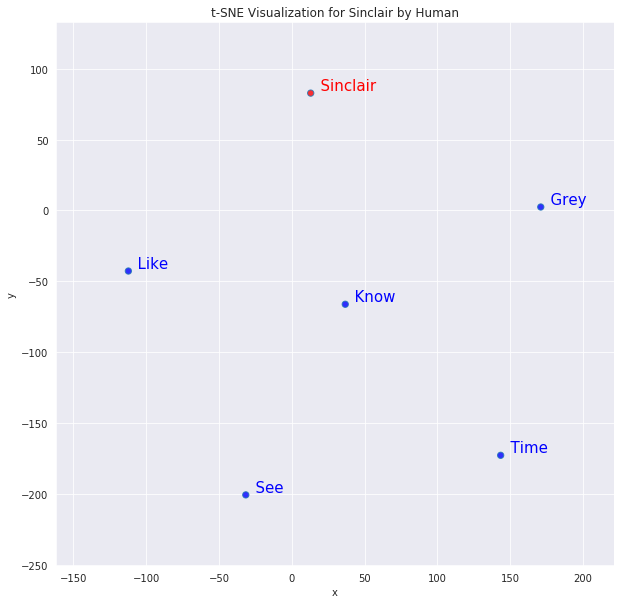

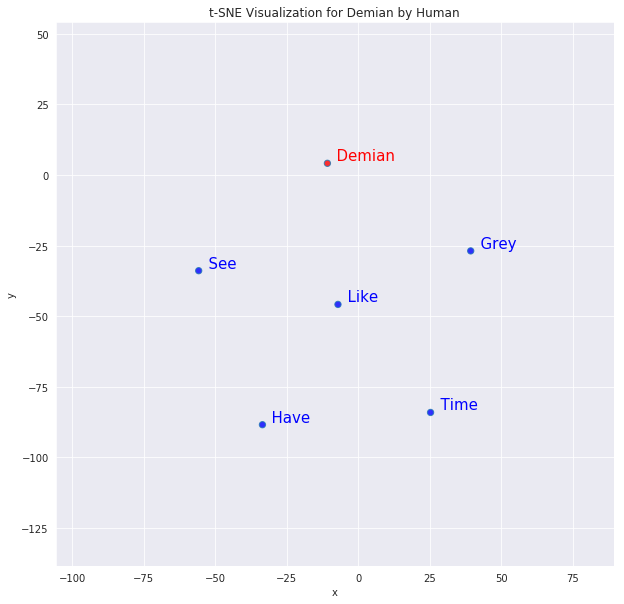

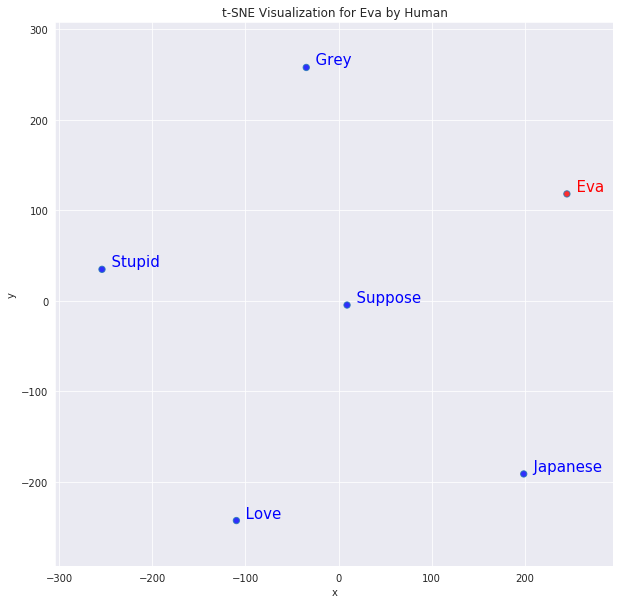

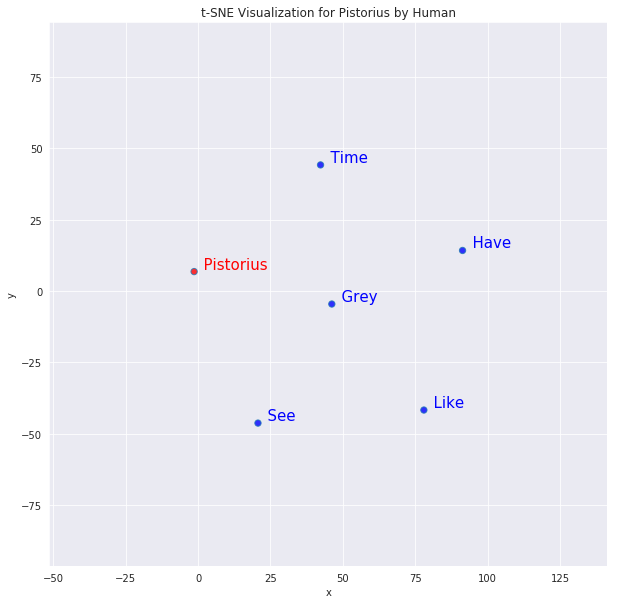

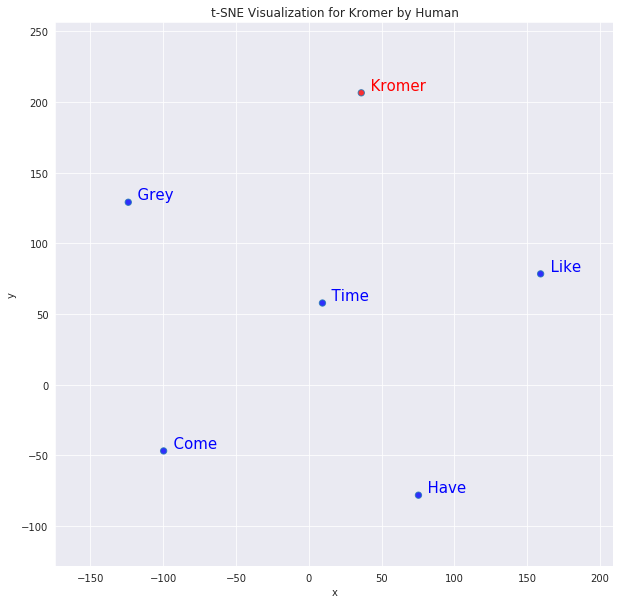

In [0]:
tsnescatterplot_2(w2v_model_Human, 'sinclair', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'demian', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'eva', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'pistorius', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'kromer', possible_w_H, "Human")


In [0]:
# Function Definition for t-sne
# def tsnescatterplot_3(model, word1,word2, word3, word4, word5, who):
def tsnescatterplot_3(model, word1,word2, word3, who):

    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = []
    color_list = []
    word_labels.append(word1)
    color_list.append('red')
    arrays = np.append(arrays, model.wv.__getitem__([word1]), axis=0)
    
    word_labels.append(word2)
    color_list.append('blue')
    arrays = np.append(arrays, model.wv.__getitem__([word2]), axis=0)

    word_labels.append(word3)
    color_list.append('grey')
    arrays = np.append(arrays, model.wv.__getitem__([word3]), axis=0)
    #print(arrays)
#     word_labels.append(word4)
#     color_list.append('yellow')
#     arrays = np.append(arrays, model.wv.__getitem__([word4]), axis=0)

#     word_labels.append(word5)
#     color_list.append('green')
#     arrays = np.append(arrays, model.wv.__getitem__([word5]), axis=0)

        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    #reduc = PCA(n_components=19).fit_transform(arrays)
    reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=3, random_state=5, perplexity=15, n_iter = 250).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 10)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
   
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title()+"/"+str(df["x"][line]),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

   
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
           
    plt.title('t-SNE Visualization for {}'.format("characters")+" in "+who)

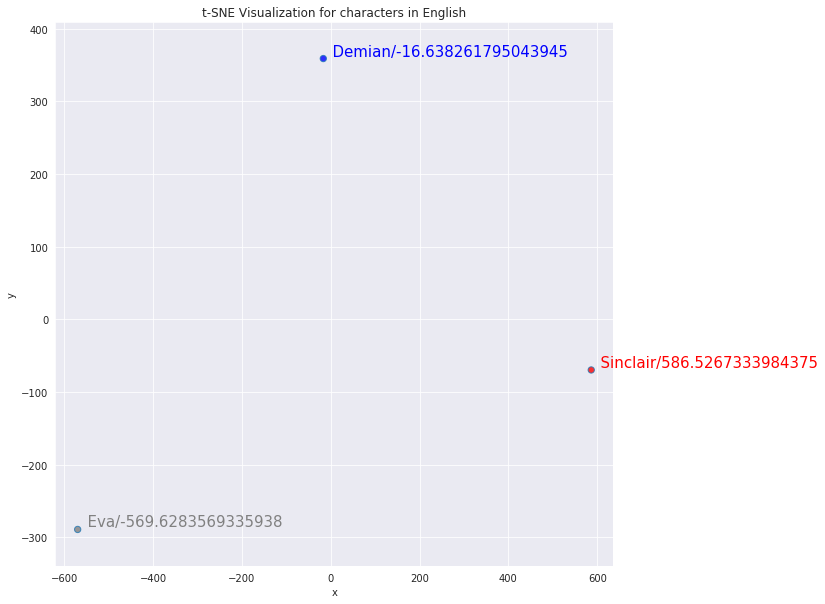

In [99]:
tsnescatterplot_3(w2v_model_Human, 'sinclair', 'demian', 'eva', "English")



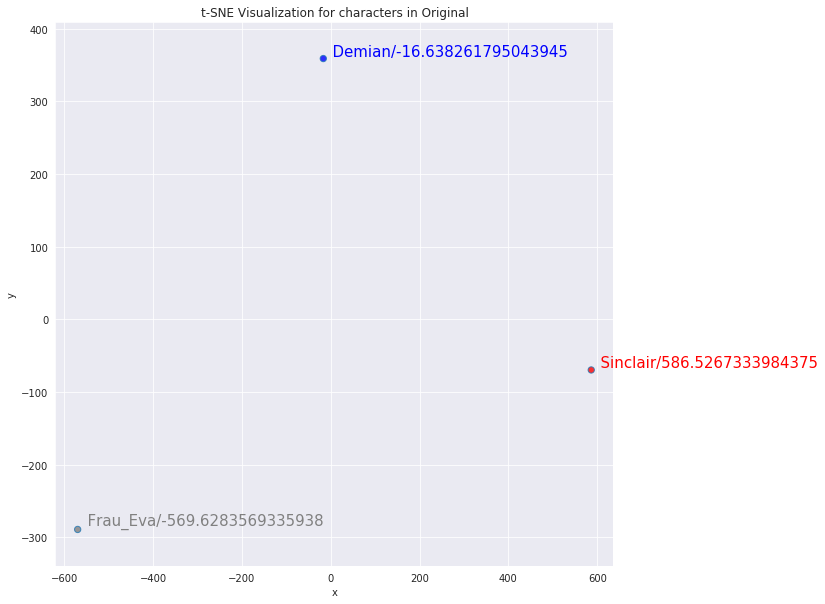

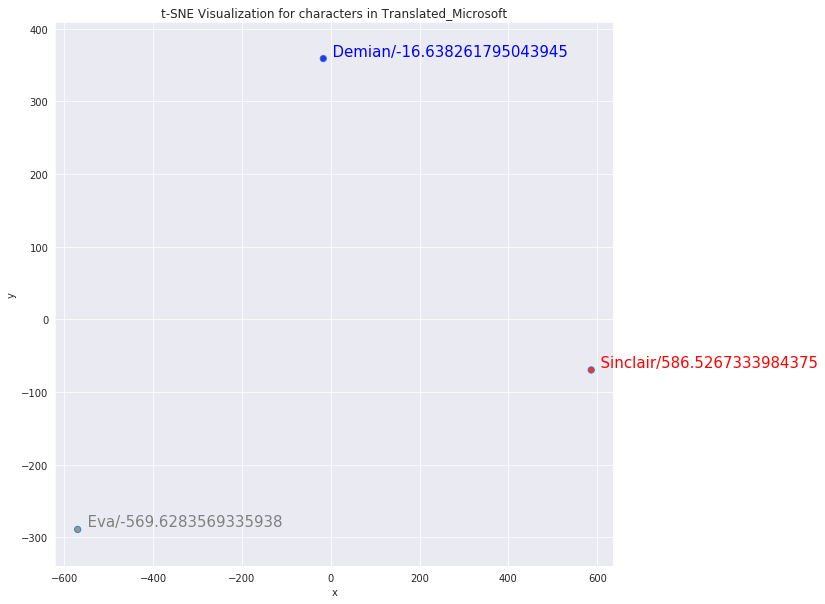

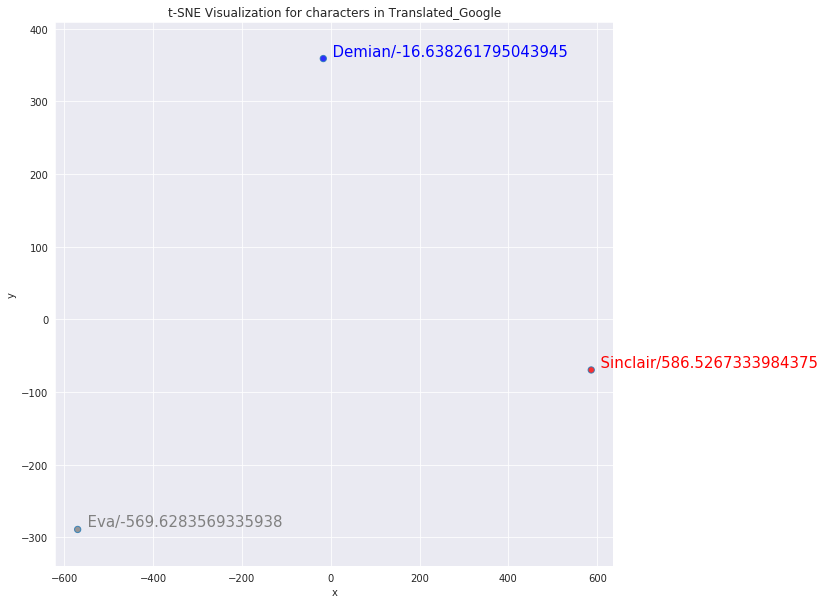

In [100]:
tsnescatterplot_3(w2v_model_Original, 'sinclair', 'demian', 'frau_eva', "Original")
tsnescatterplot_3(w2v_model_Microsoft, 'sinclair', 'demian', 'eva', "Translated_Microsoft")
tsnescatterplot_3(w2v_model_Google, 'sinclair', 'demian', 'eva', "Translated_Google")


In [65]:
print(w2v_model_Microsoft.wv.similarity("sinclair", 'demian'))
print(w2v_model_Microsoft.wv.similarity("sinclair", 'pistorius'))
print(w2v_model_Microsoft.wv.similarity("pistorius", 'demian'))


0.7810379
0.38059792
0.5568254


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [66]:
print(w2v_model_Human.wv.similarity("sinclair", 'demian'))
print(w2v_model_Human.wv.similarity("sinclair", 'pistorius'))
print(w2v_model_Human.wv.similarity("pistorius", 'demian'))

0.97376806
0.9071933
0.925264


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [67]:
print(w2v_model_Original.wv.similarity("sinclair", 'demian'))
print(w2v_model_Original.wv.similarity("sinclair", 'pistorius'))
print(w2v_model_Original.wv.similarity("pistorius", 'demian'))

0.99985594
0.9997736
0.9998153


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [68]:
print(w2v_model_Google.wv.similarity("sinclair", 'demian'))
print(w2v_model_Google.wv.similarity("sinclair", 'pistorius'))
print(w2v_model_Google.wv.similarity("pistorius", 'demian'))

0.89054424
0.7410554
0.78910583


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
# Function Definition for t-sne
def tsnescatterplot_all(model, word1,word2, word3,word4,word5, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = []
    color_list = []

    for words in model.wv.vocab:
#       if (words == word1 or words==word2 or words == word3 or words == word4 or words==word5):
#         word_labels.append(words)
#         color_list.append("red")
#         arrays = np.append(arrays, model.wv.__getitem__([words]), axis=0)

        
#       else:
        word_labels.append(" ")
        color_list.append("grey")
        arrays = np.append(arrays, model.wv.__getitem__([words]), axis=0)
    
#     word_labels.append(word1)
#     color_list.append('red')
#     arrays = np.append(arrays, model.wv.__getitem__([word1]), axis=0)

    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    #reduc = PCA(n_components=19).fit_transform(arrays)
    reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=5).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 10)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
   
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

   
    plt.xlim(Y[:, 0].min()-5, Y[:, 0].max()+5)
    plt.ylim(Y[:, 1].min()-5, Y[:, 1].max()+5)
           
    plt.title('t-SNE Visualization for {}'.format(word1.title())+" by "+who)

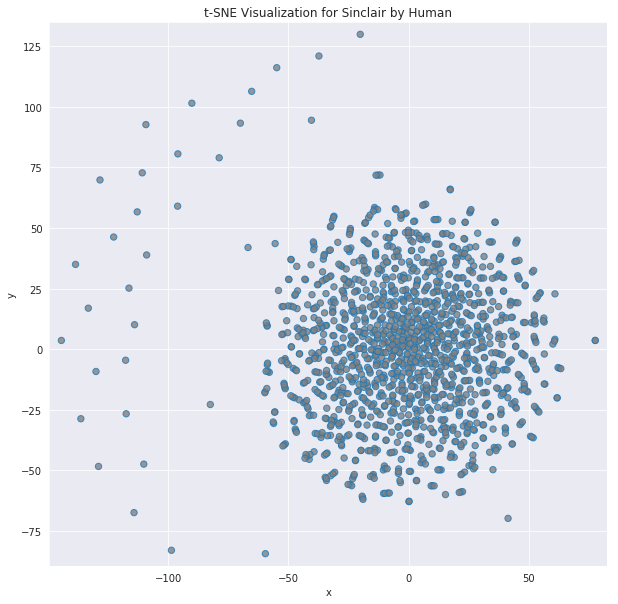

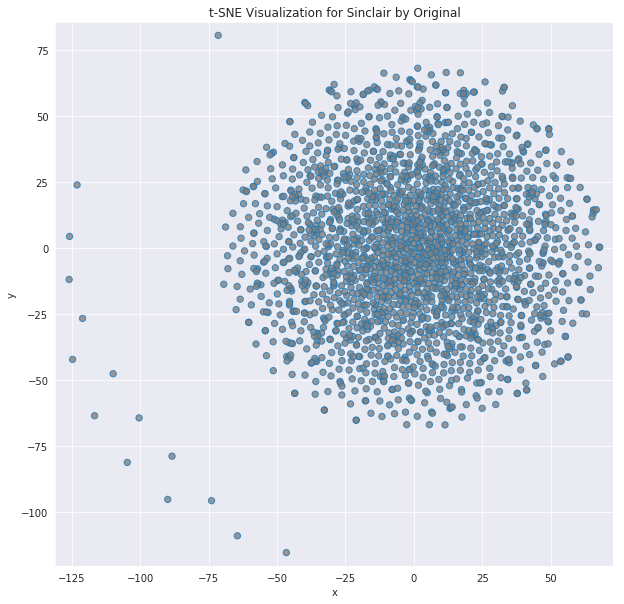

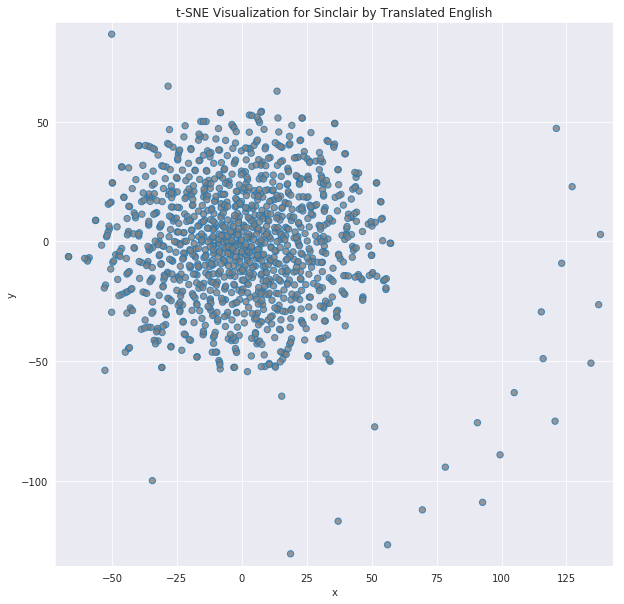

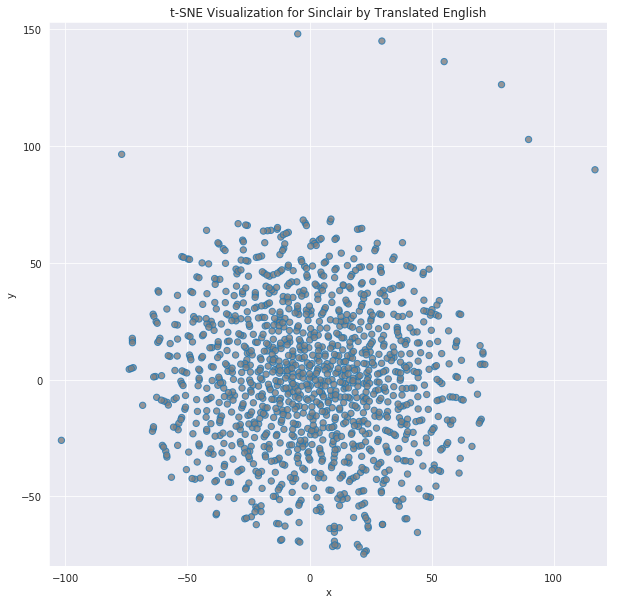

In [87]:
tsnescatterplot_all(w2v_model_Human, 'sinclair','demian','eva','pistorius','kromer', "Human")
tsnescatterplot_all(w2v_model_Original, 'sinclair', 'demian', 'frau', 'kromer', 'pistorius', "Original")
tsnescatterplot_all(w2v_model_Google, 'sinclair', 'demian', 'eva', 'kromer', 'pistorius', "Translated English")
tsnescatterplot_all(w2v_model_Microsoft, 'sinclair', 'demian', 'eva', 'kromer', 'pistorius', "Translated English")


In [0]:
tsnescatterplot(w2v_model_Human, 'sinclair', [i[0] for i in w2v_model_Human.wv.most_similar(negative=["sinclair"])], "Human")
# tsnescatterplot(w2v_model_Human, 'demian', [i[0] for i in w2v_model_Human.wv.most_similar(negative=["demian"])], "Human")
# tsnescatterplot(w2v_model_Human, 'eva', [i[0] for i in w2v_model_Human.wv.most_similar(negative=["eva"])], "Human")

In [0]:
tsnescatterplot(w2v_model_DeepL, 'sinclair', [i[0] for i in w2v_model_DeepL.wv.most_similar(negative=["sinclair"])], "DeepL")
tsnescatterplot(w2v_model_DeepL, 'demian', [i[0] for i in w2v_model_DeepL.wv.most_similar(negative=["demian"])], "DeepL")
tsnescatterplot(w2v_model_DeepL, 'eva', [i[0] for i in w2v_model_DeepL.wv.most_similar(negative=["eva"])], "DeepL")

In [0]:
tsnescatterplot(w2v_model_Google, 'sinclair', [i[0] for i in w2v_model_Google.wv.most_similar(negative=["sinclair"])], "Google")
tsnescatterplot(w2v_model_Google, 'demian', [i[0] for i in w2v_model_Google.wv.most_similar(negative=["demian"])], "Google")
tsnescatterplot(w2v_model_Google, 'eva', [i[0] for i in w2v_model_Google.wv.most_similar(negative=["eva"])], "Google")

In [0]:
tsnescatterplot(w2v_model_Microsoft, 'sinclair', [i[0] for i in w2v_model_Microsoft.wv.most_similar(negative=["sinclair"])], "Microsoft")
tsnescatterplot(w2v_model_Microsoft, 'demian', [i[0] for i in w2v_model_Microsoft.wv.most_similar(negative=["demian"])], "Microsoft")
tsnescatterplot(w2v_model_Microsoft, 'eva', [i[0] for i in w2v_model_Microsoft.wv.most_similar(negative=["eva"])], "Microsoft")

In [0]:
tsnescatterplot(w2v_model_Papago, 'sinclair', [i[0] for i in w2v_model_Papago.wv.most_similar(negative=["sinclair"])], "Papago")
tsnescatterplot(w2v_model_Papago, 'demian', [i[0] for i in w2v_model_Papago.wv.most_similar(negative=["demian"])], "Papago")
tsnescatterplot(w2v_model_Papago, 'eva', [i[0] for i in w2v_model_Papago.wv.most_similar(negative=["eva"])], "Papago")

In [0]:
# New Embeddings
words_demian = []
embeddings_demian = []
for word in list(w2v_model_Human.wv.vocab):
    embeddings_demian.append(w2v_model_Human.wv[word])
    words_demian.append(word)

In [0]:
tsne_demian_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=5000, random_state=32)
embeddings_demian_2d = tsne_demian_2d.fit_transform(embeddings_demian)

In [0]:
tsne_demian_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_demian_3d = tsne_demian_3d.fit_transform(embeddings_demian)

In [0]:
from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    name = label +".png"
    plt.savefig(name, format='png', dpi=150, bbox_inches='tight')
    plt.show()




def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

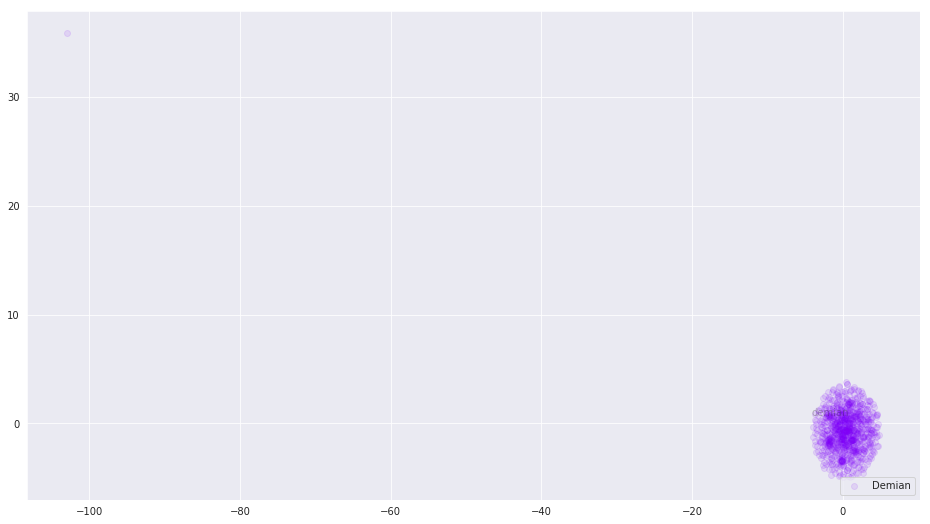

In [0]:
tsne_plot_2d('Demian', embeddings_demian_2d, ["demian"], a=0.1)


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


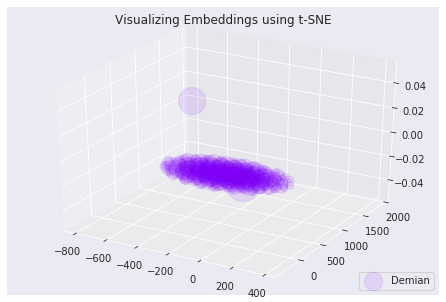

In [0]:
tsne_plot_3d('Visualizing Embeddings using t-SNE', 'Demian', embeddings_demian_3d, a=0.1)